# Pymaceuticals Inc.
---

### Analysis

After conducting a detailed analysis on the data below, there are several inferences we can make. One of the more informative data visualizations is the boxplot, which shows the tumor volumes of the entire dataset, including the mean, quartiles, minimums, maximums, and any outliers. This visualization shows that each drug had relatively consistent effects on its subjects. There is only one outlier in the dataset of almost 250 mice. This is a good sign for all four drugs, as it shows they produce relatively consistent results.

The boxplot also shows that Capomulin and Ramicane are significantly more effective at shrinking tumors over 45 days than Infubinol and Ceftamin. 

Capomulin’s effects are analyzed further in a scatter plot comparing tumor size and mouse weight. Here, a regression line shows a positive correlation between tumor volume and mouse weight. An r-value of .84 is high, demonstrating a strong correlation.
 

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_frame = mouse_metadata.merge(study_results, on = "Mouse ID").drop_duplicates()

# Display the data table for preview
mouse_frame.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [182]:
# Checking the number of mice.
mouse_frame['Mouse ID'].nunique()

249

In [106]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouse_frame['Mouse ID'],['Timepoint']
duplicate_mice_row_series = mouse_frame.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice_row_series

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1892, dtype: bool

In [107]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mouse_IDs = mouse_frame[duplicate_mice_row_series]['Mouse ID'].unique()
bad_mouse_IDs

array(['g989'], dtype=object)

In [108]:
bad_mouse_series = mouse_frame['Mouse ID'].isin(bad_mouse_IDs)
mouse_frame[bad_mouse_series]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1
918,g989,Propriva,Female,21,26,25,56.045564,1


In [109]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_frame = mouse_frame[~bad_mouse_series]
clean_mouse_frame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [181]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_frame['Mouse ID'].nunique()

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#create a groupby term
mouse_groupby = clean_mouse_frame.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumors = mouse_groupby['Tumor Volume (mm3)'].mean()
median_tumors = mouse_groupby['Tumor Volume (mm3)'].median()
variance_tumors = mouse_groupby['Tumor Volume (mm3)'].var()
std_dev_tumors = mouse_groupby['Tumor Volume (mm3)'].std()
sem_tumors = mouse_groupby['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume" : mean_tumors,
    "Median Tumor Volume" : median_tumors,
    "Variance in Tumor Volume" : variance_tumors, 
    "Standard Deviation of Tumor Volume" : std_dev_tumors,
    "SEM of Tumor Volume" : sem_tumors
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_mouse_df = mouse_groupby['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregate_mouse_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

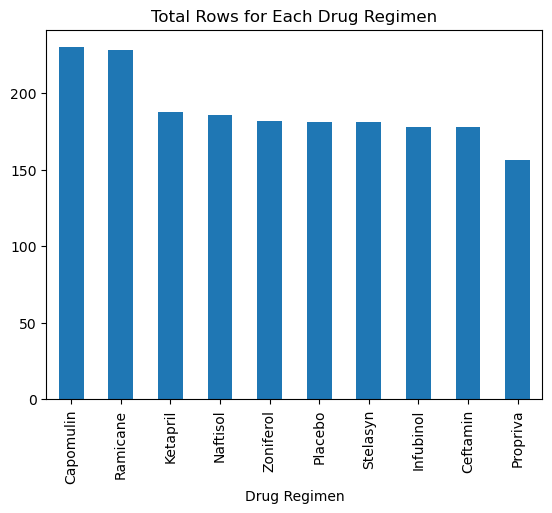

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#count how many rows per drug regimen
drug_count = clean_mouse_frame['Drug Regimen'].value_counts()
drug_count
drug_count.plot(kind = 'bar', xlabel = "Drug Regimen", title = "Total Rows for Each Drug Regimen") 
plt.show()

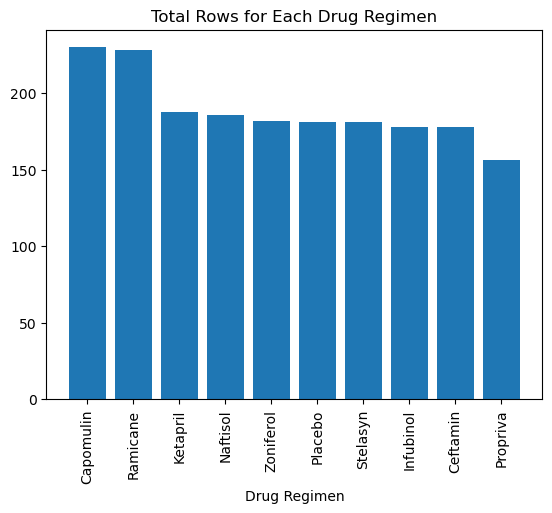

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_count.index, drug_count)
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.title('Total Rows for Each Drug Regimen')
plt.show()


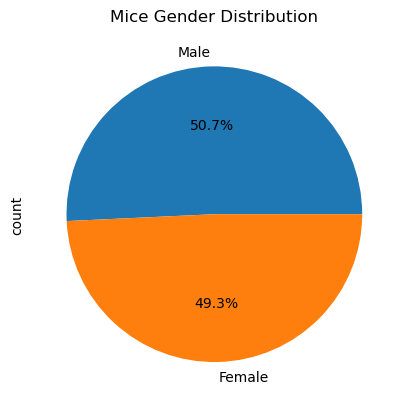

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_mouse_frame['Sex'].value_counts()
gender_distribution
gender_distribution.plot(kind = 'pie', autopct='%1.1f%%', title = 'Mice Gender Distribution')
plt.show()

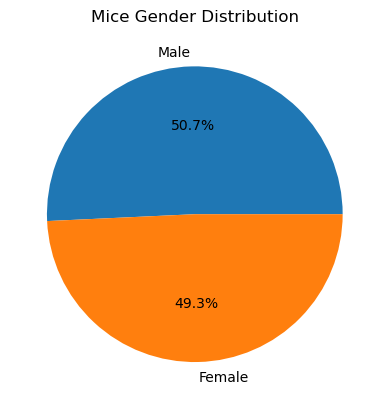

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution, labels = gender_distribution.index,  autopct='%1.1f%%')
plt.title('Mice Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_frame.groupby('Mouse ID')['Timepoint'].max()
max_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [80]:
max_timepoint.values
fat_mouse_series = clean_mouse_frame['Weight (g)'] > 20
clean_mouse_frame[fat_mouse_series]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
205,a520,Ramicane,Male,13,21,0,45.000000,0
206,a520,Ramicane,Male,13,21,5,38.723707,0
207,a520,Ramicane,Male,13,21,10,36.429388,0
208,a520,Ramicane,Male,13,21,15,35.590254,0
209,a520,Ramicane,Male,13,21,20,35.947745,0
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_df = clean_mouse_frame.merge(max_timepoint, on = ["Mouse ID", "Timepoint"])
print(final_timepoint_df.shape)
final_timepoint_df.head()

(249, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [130]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
plot_tumors = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for each drug
for each_regimen in regimens:
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    tumor_vol_series = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"] == each_regimen, 'Tumor Volume (mm3)']
    # add the tumor volume series to plot_tumors 
    plot_tumors.append(tumor_vol_series)
    # Determine outliers for this drug using IQR upper and lower bounds 
    #Calculate quantiles
    quantiles = tumor_vol_series.quantile([.25, .75])
    q1 = quantiles[0.25]
    q3 = quantiles[0.75]
    iqr = q3 - q1
    #calculate upper and lower bounds
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    #tv[lower_bound_series | upper_bound_series]
    outliers = tumor_vol_series[(tumor_vol_series > ub) | (tumor_vol_series < lb)]
   
    outliers


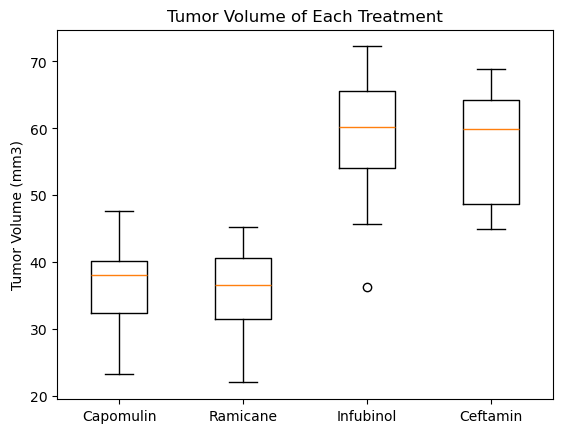

In [135]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(plot_tumors, labels=regimens, sym='o')
plt.title('Tumor Volume of Each Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

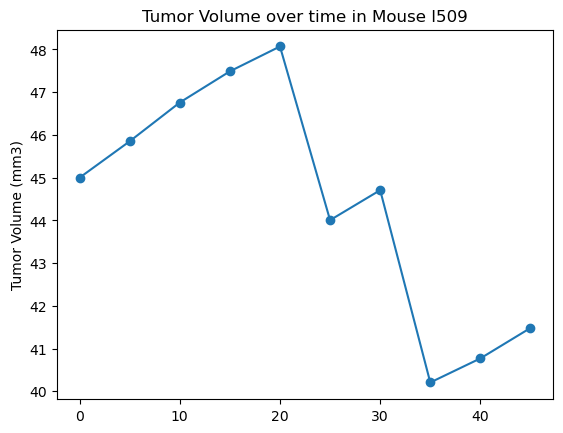

In [153]:
# Generate a line plot of tumor volume vs. time point for mouse l509 treated with Capomulin
mouse_l509 = clean_mouse_frame[(clean_mouse_frame['Mouse ID'] == 'l509') & (clean_mouse_frame['Drug Regimen'] == 'Capomulin')]

plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume over time in Mouse l509')
plt.ylabel('Tumor Volume (mm3)')


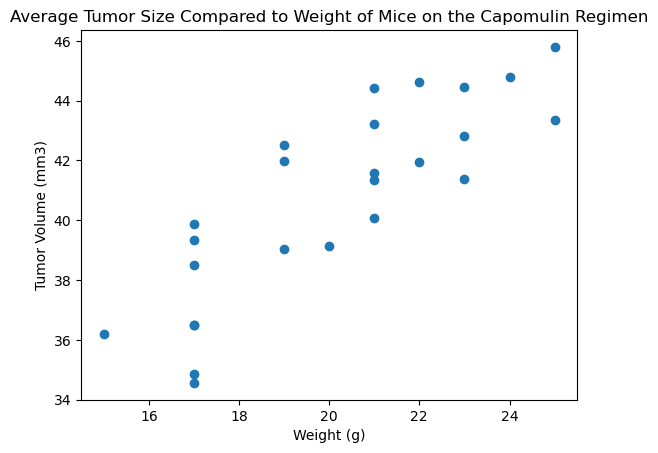

In [172]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_frame.loc[clean_mouse_frame['Drug Regimen'] == 'Capomulin']
#Find the average tumor vol
average_tumor = capomulin_data.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
#Find average Mouse Weight
average_weight = capomulin_data.groupby("Mouse ID")['Weight (g)'].mean()
# Plot against each other
plt.scatter(average_weight, average_tumor)
plt.title('Average Tumor Size Compared to Weight of Mice on the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


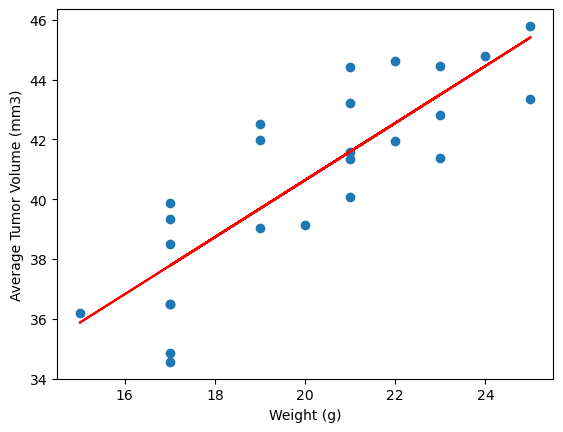

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


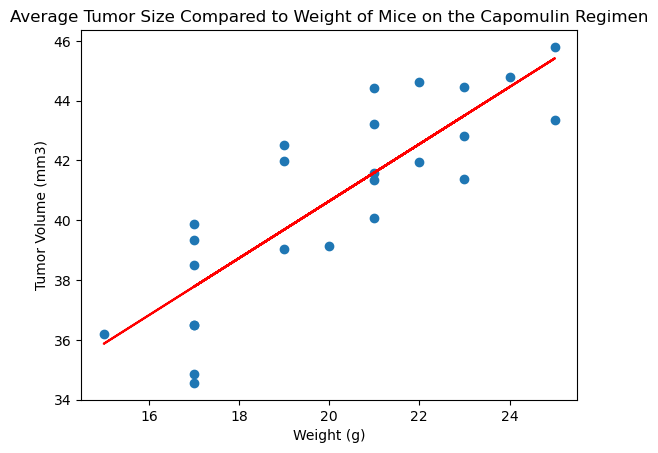

(The correlation value between mouse weight and the average tumor volume is 0.84)


In [180]:
#Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = average_weight
y_values = average_tumor
#Calculate regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#Find predicted y values
regression_y_val = slope * x_values + intercept

#replot Capomulin plot
plt.scatter(average_weight, average_tumor)
#include linear regression line
plt.plot(x_values, regression_y_val, "r-")
plt.title('Average Tumor Size Compared to Weight of Mice on the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

#print correlation value
print(f'(The correlation value between mouse weight and the average tumor volume is {str(round(rvalue,2))})')
